# Multiple Linear Regression

## single target multiple predictors

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

# Step 1

In [3]:
import pandas as pd

In [5]:
df  = pd.read_csv("50_Startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### PROFIT - RND, ADMIN , MKT
### PROFIT_PREDD = B0 + B1*RND + B2 * ADMIN + B3 * MKT

# STEP 2

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [9]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

# Step 3 = visvuallixe data

In [12]:
import seaborn as sns


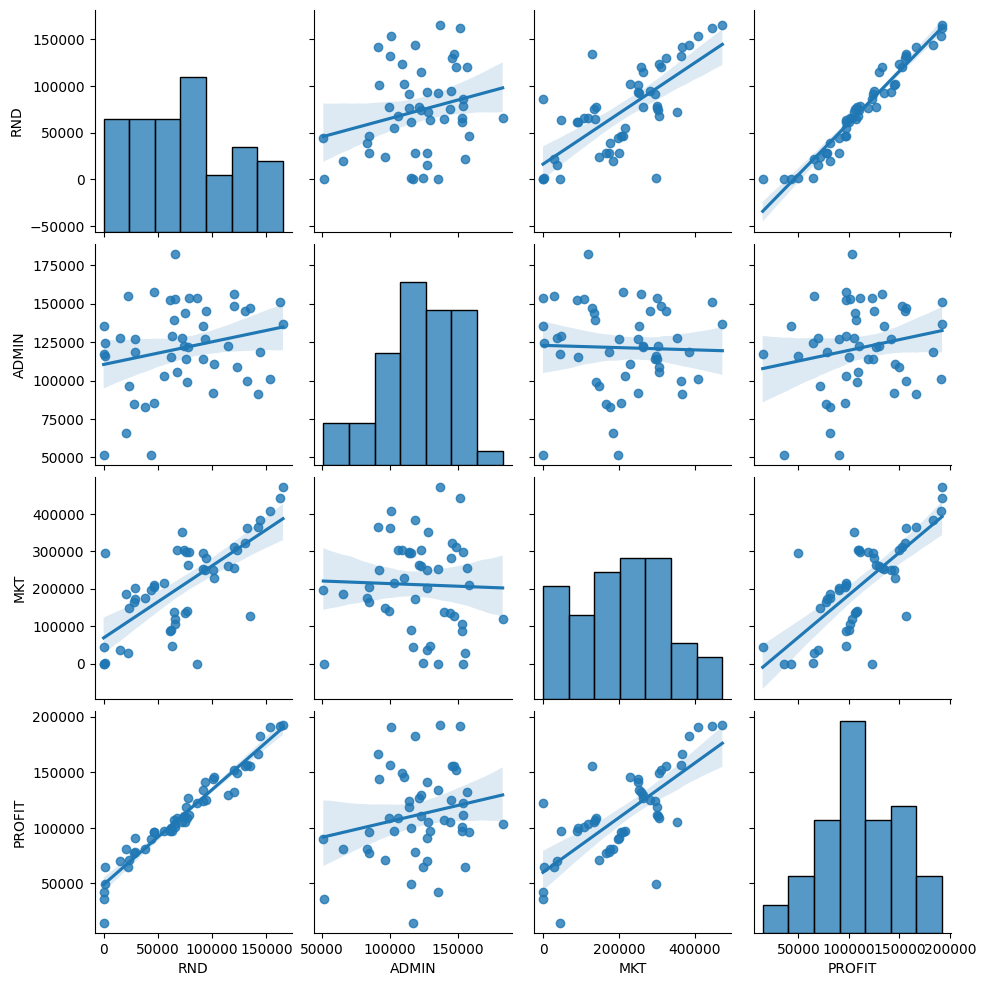

In [13]:
sns.pairplot(df,kind="reg")

In [14]:
df.corr(numeric_only=True)

,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


# Step 4 = seprate target and predictors

In [28]:
x = df[["RND","ADMIN","MKT"]]
y = df[["PROFIT"]]

In [29]:
x.head()

,RND,ADMIN,MKT
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [30]:
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


# STep 5 = Ml model

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
model = LinearRegression()

In [33]:
model.fit(x,y)

LinearRegression()

In [34]:
model.score(x,y)

0.9507459940683246

In [35]:
model.intercept_

array([50122.19298987])

In [36]:
model.coef_

array([[ 0.80571505, -0.02681597,  0.02722806]])

In [37]:
x.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

## PROFIT_PRED = 50122.192 +  0.80571505 * RND + -0.02681597 * ADMIN + 0.02722806 * MKT

1. IF RND INCREASE BY 1 UNIT PROFIT WILL INCREASE BY 0.8057
2. IF ADMIN INCREASE BY 1 UNIT PROFIT WILL DEC BY 0.0268
3. IF ADMIN INCREASE BY 1 UNIT PROFIT WILL INCREASE BY 0.02722


## FROM ABOVE RND IS HAVING HIGHEST IMPACT COZ IT HAS HIGHEST COEF

In [43]:
# R2 SCORE
model.score(x,y)

0.9507459940683246

# MODEL EVALUATION

In [45]:
from sklearn.metrics import (
    root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
)

In [46]:
def evaluate_model(model, x, y):
    # Predict the resutls on x
    ypred = model.predict(x)

    # Calculate the metrics
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)

    # Print the results
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE :  {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 : {r2:.2%}")

In [47]:
evaluate_model(model,x,y)


RMSE : 8855.34
MAE :  6471.45
MAPE : 10.60%
R2 : 95.07%


In [49]:

ypred = model.predict(x)
ypred[0:5]

array([[192521.25289008],
       [189156.76823227],
       [182147.2790962 ],
       [173696.70002553],
       [172139.51418327]])

In [50]:
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


# From above result R2 score > 80% hence it is a good model
# Out of sample prediction

In [52]:
x.head()

,RND,ADMIN,MKT
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [53]:
x.values[0:5]

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42]])

In [55]:
def predict_profit(model, rnd, admin, mkt):
    xnew = [[rnd, admin, mkt]]
    pred = model.predict(xnew)
    return pred

In [56]:
predict_profit(model, rnd=1_00_000, admin= 50_000, mkt= 60_000)


array([[130986.58344975]])

In [57]:
predict_profit(model, rnd = 40_000, admin= 50_000, mkt = 1_00_000)


array([[83732.80304684]])